# Function Transformer
In scikit-learn, a FunctionTransformer is used to transform data using a specified function. This transformer allows you to apply a custom function to your dataset as a preprocessing step within a scikit-learn pipeline or individually on columns/features.

The FunctionTransformer is used to apply a given function to your dataset, allowing for customized transformations that are not available in the standard set of scikit-learn transformers.

A function transformer is used to apply mathematical transformations to features or data. These transformations are used to preprocess the data before feeding it into machine learning models. Some common types of function transformers include:

## 1). Log Transformation:

###### Definition: 
A mathematical transformation that applies the logarithm function to the data.
###### Purpose: 
It is used to reduce the effect of outliers and to make the data more normally distributed.
###### Formula: 
y=log(x)

#### Usage:
1. Positive data: can be used only on positive values (not able to apply for negative values
2. Right-skewed data: log Transformation must be applied on right skewed data to convert it into normal distribution.



## 2). Reciprocal Transformation:

###### Definition: 
A transformation that takes the reciprocal of each data point.
###### Purpose: 
It is helpful in situations where the magnitude of values inversely influences the target variable.
###### Formula: 

y= 1/x

#### Usage:
1. can be used when dealing with data that has a natural inverse relationship. eg: speed, time for given distance.
2. Mostly used for negatively skewed data.


 
## 3). Power Transformation (e.g., square, square root):

### Square Transformation:
######  Definition: 
Squaring each data point.
###### Purpose: 
Used to amplify differences among data points.
###### Formula 
y=x**2

#### Usage:
1. Left Skewed Data: square Transformation must be applied on left skewed data to convert it into normal distribution.


 
### Square Root Transformation:
###### Definition: 
Taking the square root of each data point.
###### Purpose:
It is used to stabilize variance and make the data more normally distributed.
###### Formula: 
y=sqrt(x)

#### Usage:
1. It's useful when data is positively skewed and contains large values with substantial variance.


###### after applying these transformations on data, the probability distribution function(PDF) converts into normal distribution

### Why we need it??
For ML Algorithms like linear regression, logistic regression etc which are based on statistics perform better on normally distributed data. its necessary to transform them into normal distribution as those alogirthms are developed based on the assumption that data is normally distributed. so, its not normally distributed then we need to transform that into normal distribution.


# Note:
###### Try and apply various transformations on the data we have, and then choose the best one among them for our data.

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\chand\AppData\Local\Temp\ipykernel_29392\2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


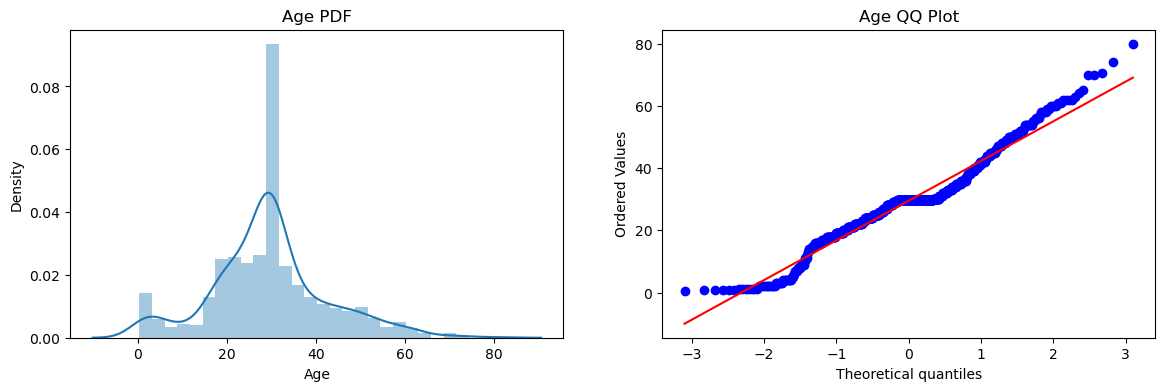

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_29392\474975069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


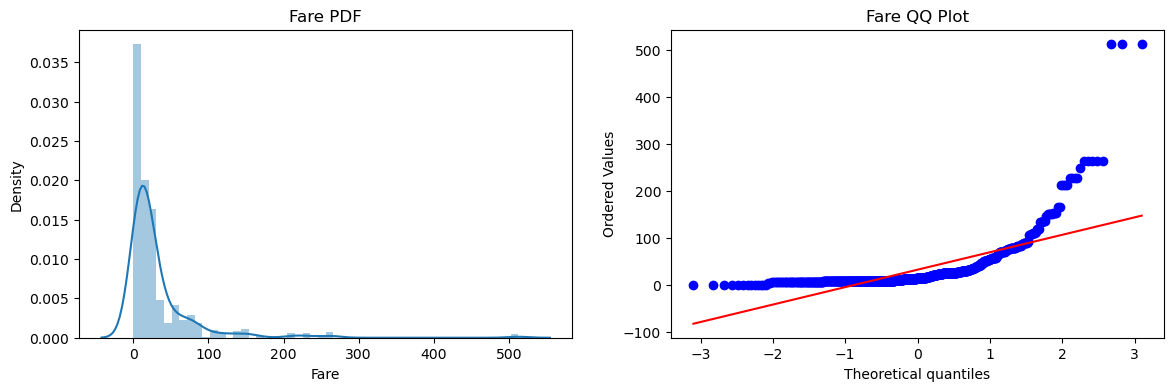

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

# Without transformation

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


# With transformation

In [13]:
#applying log tranformation. 
#difference between np.logp, np.log1p : the only difference is if there are zero's in data then logp handle handle that where as logp adds 1 to each datapoint first before applying transformation. so, it won't have issue. and is mostly used for this reason
trf = FunctionTransformer(func=np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


######  from above we can understand that performance of logistic regression has imnproved significantly, where as decision tree's performance is not much effected. it's because logistic regression is developed based on statistics.

In [16]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6622347066167292


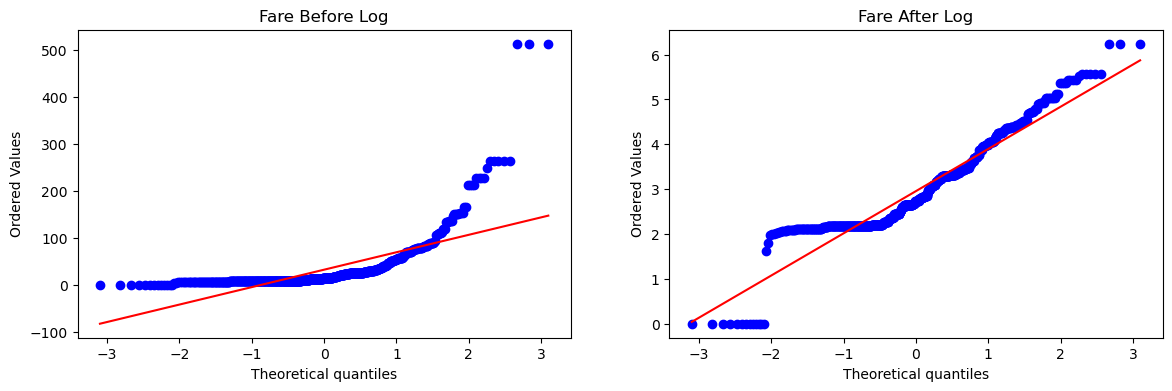

In [17]:
## Q-Q plot before after log transformation on Fare data
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

######  From above we can understnad that after applying log transformation, it has moved closer to normal distribution

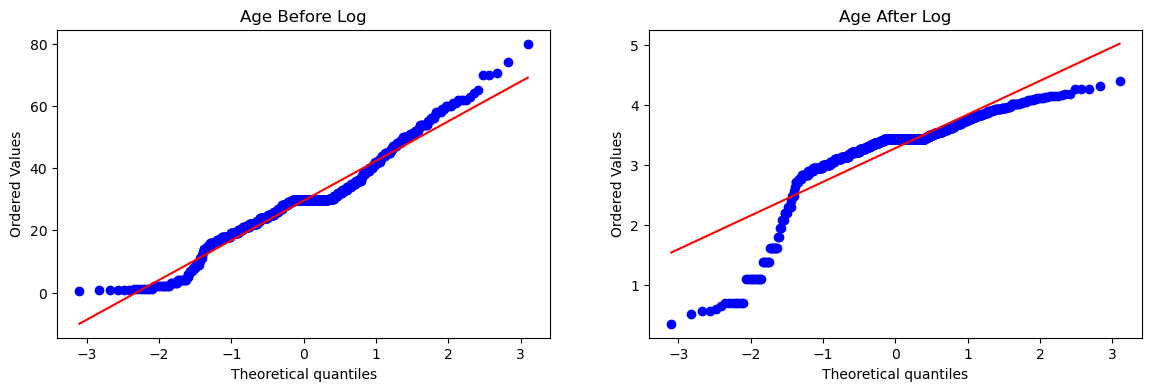

In [18]:
## Q-Q plot before after log transformation on Age data
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

######  From above we can understnad that after applying log transformation, it has moved away to normal distribution

## So, applying log transformation on only Fare data.

In [19]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [21]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6633083645443196


# Creating a function which accepts transformation function as input and returns the performance , plot 

In [22]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6589013732833957


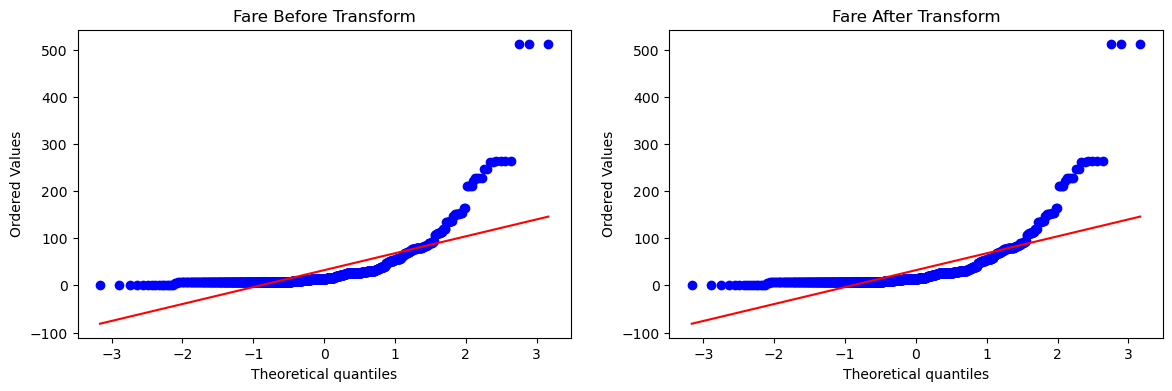

In [23]:
# no tranformation:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


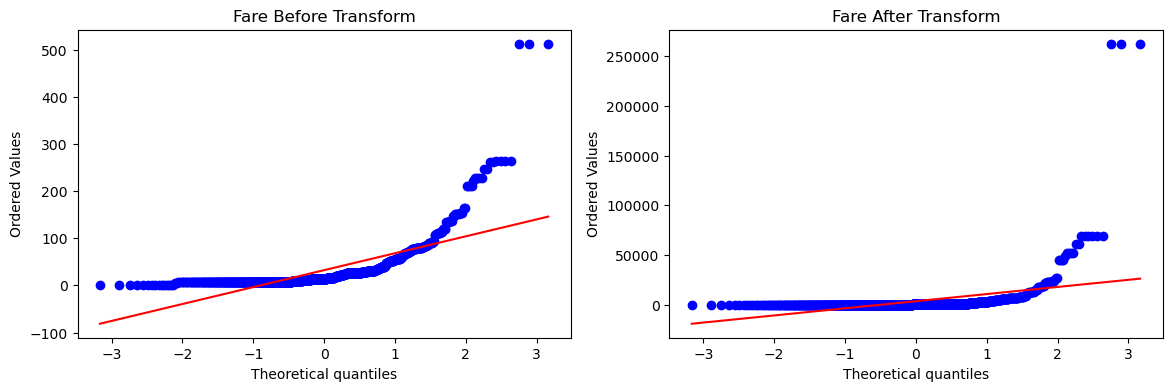

In [24]:
#square tranformation:
apply_transform(lambda x:x**2)

Accuracy 0.39843945068664166


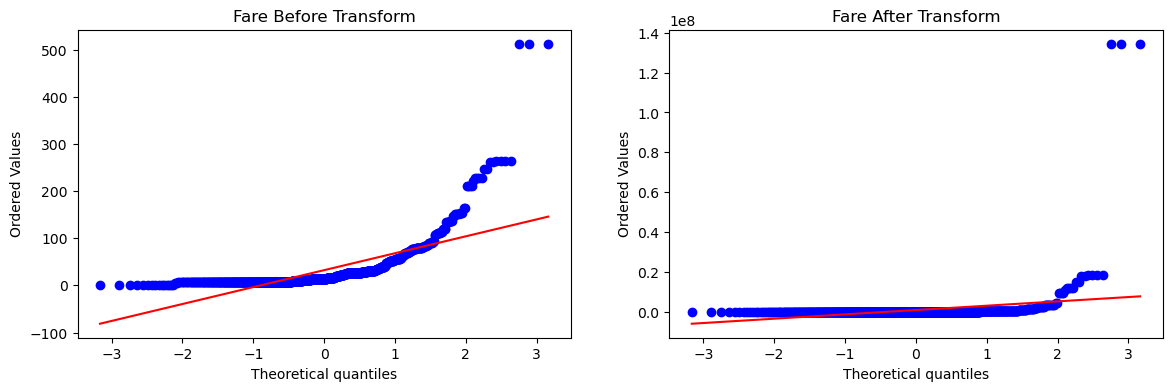

In [25]:
# cube tranformation:
apply_transform(lambda x:x**3)

Accuracy 0.6611485642946316


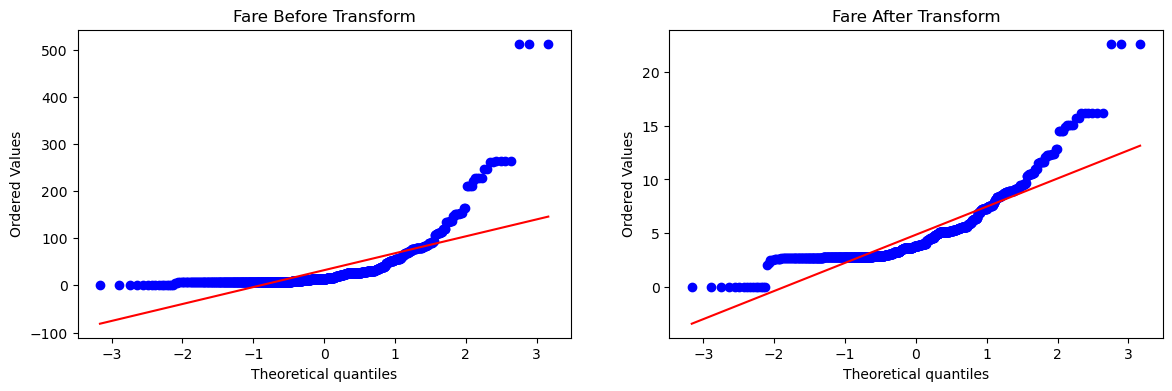

In [26]:
# sqrt tranformation:
apply_transform(lambda x:x**0.5)

Accuracy 0.61729088639201


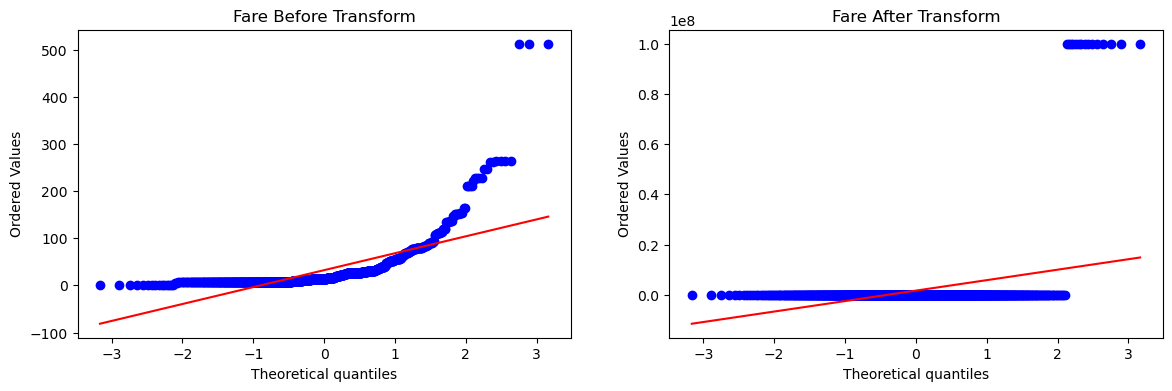

In [27]:
# Reciprocal tranformation:
apply_transform(lambda x:1/(x+0.00000001)) #here 0.0000001 is just to handle zero values

Accuracy 0.6195131086142323


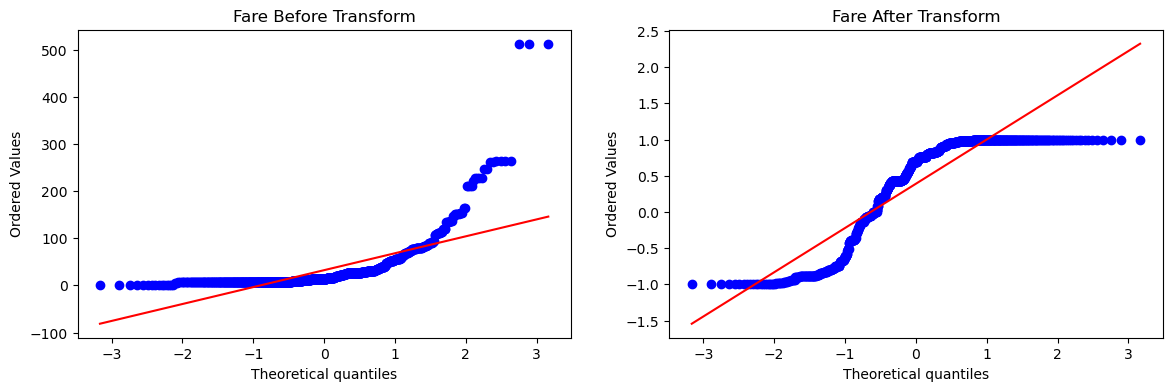

In [28]:
# Sine tranformation:
apply_transform(np.sin)